## Data Processing

In [1]:
from DWR_preprocess import *

station_number = 26850
year_regex = '2021'

In [2]:
blitzortung_array = blitzortung_preprocessing(station_number, matrix_shape=200, year_regex=year_regex)

Latitude is 53.86583, Longitude is 28.04028
Blitzortung data is already converted
Array shape is: (3284, 200, 200)


In [4]:
radar_array = radar_preprocessing(station_number, 500, year_regex=year_regex)

N of matched files is 3284
N of non-lightning cases: 500
Converting phen


100%|██████████| 3758/3758 [01:20<00:00, 46.60it/s] 


echo_top data is already converted
reflectivity data is already converted
prop data is already converted
Converting to numpy


100%|██████████| 3758/3758 [00:01<00:00, 2147.32it/s]


Shape of radar array: (3758, 200, 200, 19)


In [5]:
stack = concatenate_data(radar_array, blitzortung_array, station_number, year_regex=year_regex)

All data converted and saved!


In [6]:
stack.shape

(3758, 200, 200, 20)

## Sliding Window 

In [6]:
import numpy as np
from DWR_preprocess import *
import warnings
warnings.filterwarnings("ignore")

station_number = 26061
window = 5

In [2]:
stack = np.load(Paths.interim + f'stack_{station_number}.npy')
stack.shape

(6685, 200, 200, 19)

In [3]:
factors(stack.shape[0])
#stack = np.delete(stack, (np.arange(amount_to_delete)), 0)

{1, 5, 7, 35, 191, 955, 1337, 6685}

In [4]:
precomputing(stack, station_number, window, distribution=np.random.uniform, value=0.03)

target is already computed
delta is already computed


In [5]:
%%time
window_data_filter(stack, split_value=1337, window=5, station_number=26061)

Iteration: 0
Iteration data is 
 dask.array<reshape, shape=(51362192, 5, 5, 19), dtype=int32, chunksize=(1152480, 5, 5, 19), chunktype=numpy.ndarray>
TF: false-(51334770,), true-(27422,)


  0%|          | 0/48 [00:00<?, ?it/s]

Remaining percent  = 3.0


  0%|          | 0/48 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

TF processed 
 : false-(493909,), true-(26389,)
Iteration result is 
 dask.array<concatenate, shape=(520298, 5, 5, 19), dtype=int32, chunksize=(21156, 5, 5, 19), chunktype=numpy.ndarray>


  0%|          | 0/84 [00:00<?, ?it/s]

Iteration: 1
Iteration data is 
 dask.array<reshape, shape=(51362192, 5, 5, 19), dtype=int32, chunksize=(1152480, 5, 5, 19), chunktype=numpy.ndarray>
TF: false-(51352035,), true-(10157,)


  0%|          | 0/48 [00:00<?, ?it/s]

Remaining percent  = 3.0


  0%|          | 0/48 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

TF processed 
 : false-(436683,), true-(9442,)
Iteration result is 
 dask.array<concatenate, shape=(446125, 5, 5, 19), dtype=int32, chunksize=(21132, 5, 5, 19), chunktype=numpy.ndarray>


  0%|          | 0/89 [00:00<?, ?it/s]

Iteration: 2
Iteration data is 
 dask.array<reshape, shape=(51362192, 5, 5, 19), dtype=int32, chunksize=(1152480, 5, 5, 19), chunktype=numpy.ndarray>
TF: false-(51348734,), true-(13458,)


  0%|          | 0/48 [00:00<?, ?it/s]

Remaining percent  = 3.0


  0%|          | 0/48 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

TF processed 
 : false-(569975,), true-(12786,)
Iteration result is 
 dask.array<concatenate, shape=(582761, 5, 5, 19), dtype=int32, chunksize=(19631, 5, 5, 19), chunktype=numpy.ndarray>


  0%|          | 0/85 [00:00<?, ?it/s]

Iteration: 3
Iteration data is 
 dask.array<reshape, shape=(51362192, 5, 5, 19), dtype=int32, chunksize=(1152480, 5, 5, 19), chunktype=numpy.ndarray>
TF: false-(51352205,), true-(9987,)


  0%|          | 0/48 [00:00<?, ?it/s]

Remaining percent  = 3.0


  0%|          | 0/48 [00:00<?, ?it/s]

  0%|          | 0/46 [00:00<?, ?it/s]

TF processed 
 : false-(325336,), true-(9172,)
Iteration result is 
 dask.array<concatenate, shape=(334508, 5, 5, 19), dtype=int32, chunksize=(20490, 5, 5, 19), chunktype=numpy.ndarray>


  0%|          | 0/94 [00:00<?, ?it/s]

Iteration: 4
Iteration data is 
 dask.array<reshape, shape=(51362192, 5, 5, 19), dtype=int32, chunksize=(1152480, 5, 5, 19), chunktype=numpy.ndarray>
TF: false-(51354022,), true-(8170,)


  0%|          | 0/48 [00:00<?, ?it/s]

Remaining percent  = 3.0


  0%|          | 0/48 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

TF processed 
 : false-(517190,), true-(7510,)
Iteration result is 
 dask.array<concatenate, shape=(524700, 5, 5, 19), dtype=int32, chunksize=(20063, 5, 5, 19), chunktype=numpy.ndarray>


  0%|          | 0/86 [00:00<?, ?it/s]

CPU times: user 18min 7s, sys: 24min 49s, total: 42min 57s
Wall time: 26min 20s


In [8]:
target_np = np.load(Paths.interim + f'target_{station_number}.npy')

In [11]:
np.unique(target_np, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        20], dtype=int32),
 array([256728022,     69194,      9481,      2655,       858,       394,
              168,        78,        41,        22,        18,        13,
                5,         4,         1,         3,         1,         2]))

## Machine Learning preprocessing

In [1]:
from DWR_preprocess import *

window_shape = 5
station_number = 26061

In [2]:
df = from_windows_to_df(Paths.data + f'lightning_stack_{station_number}_classification', 5, station_number)

100%|██████████| 438/438 [00:03<00:00, 114.51it/s]
/home/meteofurletov/ipynb/iram/lightning_classification/notebooks/DWR_preprocess.py:1192: RuntimeWarning: invalid value encountered in log
  log_list.append(np.log(df[f'Zmax_layer_{level_y[i]}'][i]))
/home/meteofurletov/ipynb/iram/lightning_classification/notebooks/DWR_preprocess.py:1192: RuntimeWarning: divide by zero encountered in log
  log_list.append(np.log(df[f'Zmax_layer_{level_y[i]}'][i]))


In [ ]:
df.describe()

,"R(0,0,1)","R(0,0,2)","R(0,0,3)","R(0,0,4)","R(0,0,5)","R(0,0,6)","R(0,0,7)","R(0,0,8)","R(0,0,9)","R(0,0,10)",...,Zmax_layer_4,Zmax_layer_5,Zmax_layer_6,Zmax_layer_7,Zmax_layer_8,Zmax_layer_9,Zmax_layer_10,Zmax_layer_11,y_param,H_Zmax
count,2.419752e+06,2.419752e+06,2.419752e+06,2.419752e+06,2.419752e+06,2.419752e+06,2.419752e+06,2.419752e+06,2.419752e+06,2.419752e+06,...,2.419752e+06,2.419752e+06,2.419752e+06,2.419752e+06,2.419752e+06,2.419752e+06,2.419752e+06,2.419752e+06,2.419752e+06,2.419752e+06
mean,-5.814771e+01,-4.514036e+01,-3.363161e+01,-2.773858e+01,-3.439420e+01,-4.950406e+01,-6.838375e+01,-8.197534e+01,-8.899375e+01,-9.280233e+01,...,3.839841e+00,-4.652320e+00,-2.259248e+01,-4.745566e+01,-6.932081e+01,-8.209938e+01,-8.858071e+01,-9.288958e+01,1.385457e+01,3.174157e+00
std,5.531203e+01,5.776784e+01,5.693946e+01,5.462584e+01,5.521353e+01,5.546910e+01,5.043180e+01,4.158829e+01,3.392862e+01,2.799605e+01,...,3.711904e+01,4.359484e+01,5.330158e+01,5.683953e+01,5.105161e+01,4.229855e+01,3.506563e+01,2.832025e+01,1.000266e+01,1.749675e+00
min,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,...,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,0.000000e+00,1.000000e+00
25%,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,...,8.000000e+00,4.000000e+00,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,8.000000e+00,2.000000e+00
50%,-1.000000e+02,-1.000000e+02,6.000000e+00,7.000000e+00,4.000000e+00,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,...,1.300000e+01,1.100000e+01,7.000000e+00,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,1.300000e+01,3.000000e+00
75%,1.000000e+01,1.300000e+01,1.500000e+01,1.400000e+01,1.100000e+01,8.000000e+00,2.000000e+00,-1.000000e+02,-1.000000e+02,-1.000000e+02,...,2.000000e+01,1.600000e+01,1.400000e+01,1.000000e+01,1.000000e+00,-1.000000e+02,-1.000000e+02,-1.000000e+02,1.800000e+01,4.000000e+00
max,6.100000e+01,6.200000e+01,5.900000e+01,5.800000e+01,6.000000e+01,5.900000e+01,5.900000e+01,5.800000e+01,5.600000e+01,5.500000e+01,...,6.000000e+01,6.000000e+01,5.900000e+01,6.400000e+01,6.400000e+01,5.800000e+01,5.600000e+01,5.500000e+01,6.400000e+01,1.100000e+01


### Regression target feature

In [3]:
stack = np.load(Paths.interim + f'stack_{station_number}.npy')
stack.shape

(6685, 200, 200, 19)

In [4]:
dates = stack[:, :, :, 15]
x_coors = stack[:, :, :, 16].astype('ubyte')
y_coors = stack[:, :, :, 17].astype('ubyte')
target = stack[:, :, :, -1].astype('ubyte')

In [5]:
df_stack = pd.DataFrame({'dates':dates.flatten(), 'x_coors':x_coors.flatten(), 'y_coors':y_coors.flatten(), 'r_target':target.flatten()})

In [6]:
import duckdb

In [7]:
df_all  = duckdb.query("SELECT * FROM df join df_stack on df.date = df_stack.dates and df.x_coor = df_stack.x_coors and df.y_coor = df_stack.y_coors").df()

FloatProgress(value=0.0, layout=Layout(width='100%'), style=ProgressStyle(bar_color='black'))

In [8]:
df_all.columns

Index(['R(0,0,1)', 'R(0,0,2)', 'R(0,0,3)', 'R(0,0,4)', 'R(0,0,5)', 'R(0,0,6)',
       'R(0,0,7)', 'R(0,0,8)', 'R(0,0,9)', 'R(0,0,10)',
       ...
       'Zmax_layer_8', 'Zmax_layer_9', 'Zmax_layer_10', 'Zmax_layer_11',
       'y_param', 'H_Zmax', 'dates', 'x_coors', 'y_coors', 'r_target'],
      dtype='object', length=326)

In [10]:
df_dropped = df_all.drop(['dates', 'x_coors', 'y_coors'], axis= 1)
df_dropped.to_parquet(Paths.interim + f'{station_number}_Convective_cloud_windows_data_regr.parquet')

## Filtering data

In [1]:
from DWR_preprocess import *

window_shape = 5
station_number = 26061

In [4]:
df = true_data_filter(Paths.interim + f'{station_number}_Convective_cloud_windows_data_regr.parquet',station_number)

Before: 0 - (2341063,), 1 - (78689,)
After:  0 - (2225526,), 1 - (68119,)


## Oversampling

In [5]:
df_select = pd.read_parquet(Paths.interim + f'df_filter_{station_number}.parquet')
df_select.columns

Index(['R(0,0,1)', 'R(0,0,2)', 'R(0,0,3)', 'R(0,0,4)', 'R(0,0,5)', 'R(0,0,6)',
       'R(0,0,7)', 'R(0,0,8)', 'R(0,0,9)', 'R(0,0,10)',
       ...
       'Zmax_layer_5', 'Zmax_layer_6', 'Zmax_layer_7', 'Zmax_layer_8',
       'Zmax_layer_9', 'Zmax_layer_10', 'Zmax_layer_11', 'y_param', 'H_Zmax',
       'r_target'],
      dtype='object', length=323)

Original dataset shape Counter({0: 1873174, 1: 62627})
0
1
2
3
4
5
Best oversampling at 2 repeat with f1: 0.54
Original dataset shape Counter({0: 1873174, 1: 62627})
Resampled dataset shape Counter({0: 1873174, 1: 187881})
Accuracy is 0.9693
f1_score is 0.5377
precision_score is 0.5523
recall_score is 0.5239
roc_auc_score is 0.7677
HSS is 0.5219
ETS is 0.353
CSI is 0.3677
sedi is 0.7639


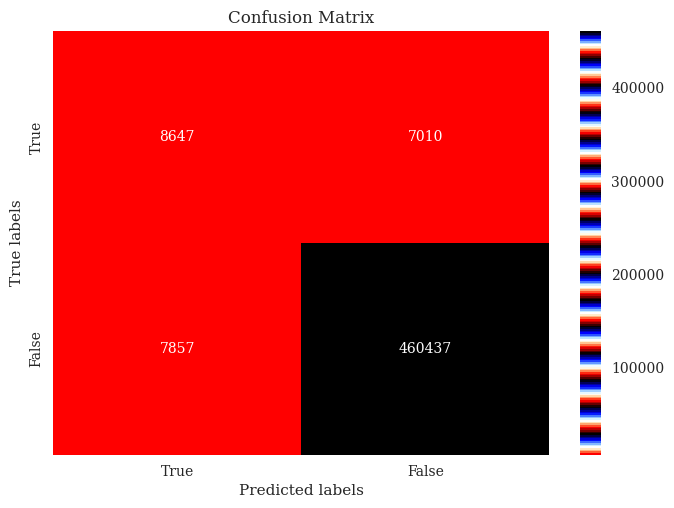

In [5]:
oversampler_and_scaler(Paths.interim + f'df_filter_{station_number}.parquet')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

import torch
from DWR_preprocess import *
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import  SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")

station_number = 26061
window = 5

In [3]:
X_train =  np.load(Paths.data + 'X_train_oversampled.npy')
y_train =  np.load(Paths.data + 'y_train_oversampled.npy')
X_test =   np.load(Paths.data + 'X_test.npy')
y_test =   np.load(Paths.data + 'y_test.npy')

In [145]:
scaler = joblib.load(Paths.models+'scaler.joblib')

In [6]:
X_train_reversed_scaled =  scaler.inverse_transform(X_train)
X_test_reversed_scaled =   scaler.inverse_transform(X_test)

In [ ]:
cols = pd.read_parquet(Paths.interim + f'df_filter_{station_number}.parquet').columns
cols = cols.drop('target')

In [149]:
pd.DataFrame(X_train_reversed_scaled, columns=cols)

,"R(0,0,1)","R(0,0,2)","R(0,0,3)","R(0,0,4)","R(0,0,5)","R(0,0,6)","R(0,0,7)","R(0,0,8)","R(0,0,9)","R(0,0,10)",...,Zmax_layer_4,Zmax_layer_5,Zmax_layer_6,Zmax_layer_7,Zmax_layer_8,Zmax_layer_9,Zmax_layer_10,Zmax_layer_11,y_param,H_Zmax
0,-100.0,15.0,16.0,21.0,21.0,21.0,20.0,18.0,13.0,11.0,...,38.0,40.0,41.0,38.0,34.0,30.0,19.0,14.0,41.0,6.0
1,26.0,26.0,26.0,24.0,22.0,14.0,8.0,-100.0,-100.0,-100.0,...,36.0,36.0,33.0,28.0,19.0,13.0,-100.0,-100.0,28.0,1.0
2,16.0,16.0,16.0,12.0,3.0,3.0,1.0,-100.0,-100.0,-100.0,...,19.0,13.0,7.0,3.0,-100.0,-100.0,-100.0,-100.0,16.0,1.0
3,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,...,3.0,0.0,-2.0,4.0,6.0,-100.0,-100.0,-100.0,0.0,1.0
4,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,...,8.0,6.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2123677,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,...,38.0,34.0,32.0,32.0,32.0,32.0,29.0,27.0,43.0,3.0
2123678,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,...,38.0,34.0,32.0,32.0,32.0,32.0,29.0,27.0,43.0,3.0
2123679,32.0,32.0,32.0,33.0,33.0,33.0,30.0,27.0,24.0,18.0,...,33.0,33.0,33.0,30.0,27.0,24.0,18.0,-100.0,33.0,4.0
2123680,32.0,32.0,32.0,33.0,33.0,33.0,30.0,27.0,24.0,18.0,...,33.0,33.0,33.0,30.0,27.0,24.0,18.0,-100.0,33.0,4.0


Accuracy is 0.9709
f1_score is 0.622
precision_score is 0.7408
recall_score is 0.5361
roc_auc_score is 0.8597
HSS is 0.6073
ETS is 0.4361
CSI is 0.4514
sedi is 0.7939
CPU times: user 1min 34s, sys: 15.1 ms, total: 1min 34s
Wall time: 1min 34s


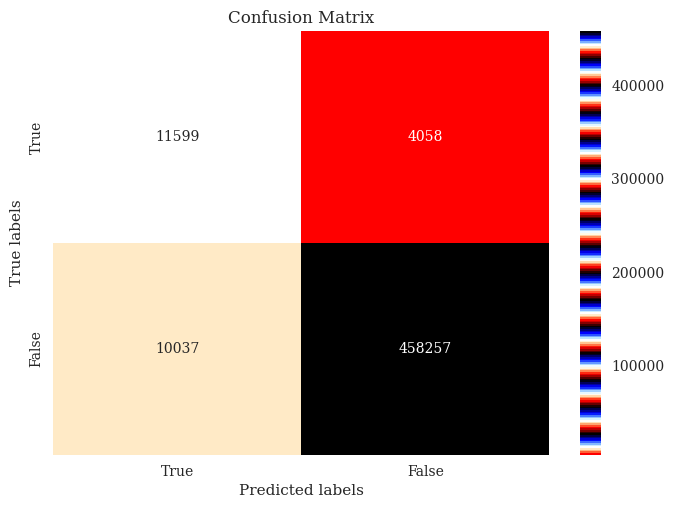

In [150]:
%%time
#classificator 
sgd = LogisticRegression(solver="saga", n_jobs = -1, random_state=42) 
sgd.fit(X_train, y_train)
sgd_pred = sgd.predict(X_test)


# get scores
sgd_res = scorer(y_test, sgd_pred)

In [151]:
sgd.coef_, sgd.intercept_

(array([[-1.08822714e-02, -4.86896839e-02,  9.48862089e-03,
         -3.01081019e-03,  2.30443195e-02,  1.88278273e-02,
         -1.82076059e-02, -2.12270098e-02, -2.17548007e-02,
         -2.45172636e-02, -1.96098783e-03,  6.34369269e-03,
          1.31481442e-02,  6.12416804e-03,  2.08138801e-02,
         -3.27506233e-02, -9.97545443e-03,  3.12716953e-02,
          1.05690113e-02, -4.46757578e-03,  1.07977540e-02,
          2.67741541e-05,  1.72874437e-02, -2.78842803e-02,
          1.17870353e-02,  3.14504554e-02,  1.76840703e-02,
          6.93992431e-03,  2.37678139e-03,  1.95622137e-02,
          8.83337437e-03,  1.45182890e-02,  1.48727186e-02,
          1.23917710e-02, -4.97251995e-02,  3.16940378e-03,
          6.12290961e-03,  3.91397876e-02,  1.55691760e-02,
          3.11654804e-03, -1.38328491e-02, -6.32491535e-03,
          4.35628039e-03,  1.60364428e-03, -1.61115441e-02,
         -3.97467039e-02,  8.75528889e-03, -5.58154364e-03,
         -4.13645974e-04, -7.44167339e-0

Text(0.5, 0, 'Linear Regression Coef')

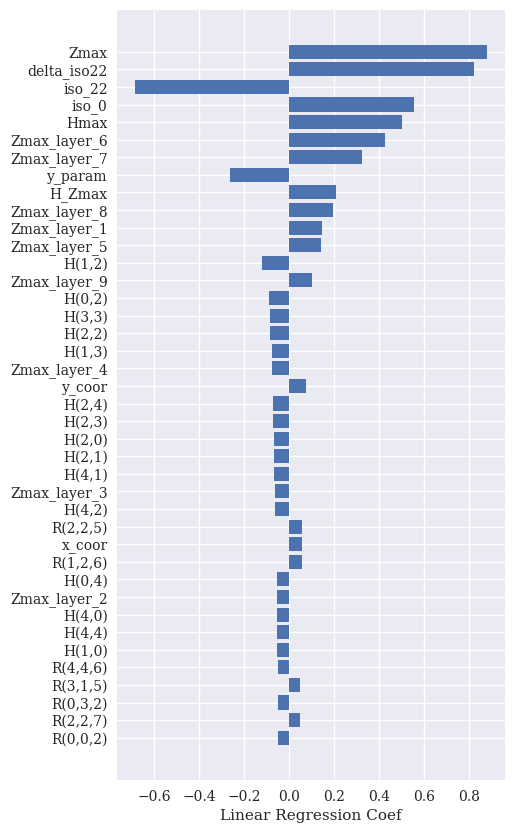

In [152]:
plt.figure(figsize=(5,10))
sorted_idx = np.abs(sgd.coef_).reshape(321).argsort()[-40:]
plt.barh(cols[sorted_idx], sgd.coef_.reshape(321)[sorted_idx])
plt.xlabel("Linear Regression Coef")

Accuracy is 0.9804
f1_score is 0.6751
precision_score is 0.6306
recall_score is 0.7262
roc_auc_score is 0.8113
HSS is 0.665
ETS is 0.4981
CSI is 0.5095
sedi is 0.8897
CPU times: user 1h 24min 54s, sys: 10.4 s, total: 1h 25min 5s
Wall time: 8min 15s


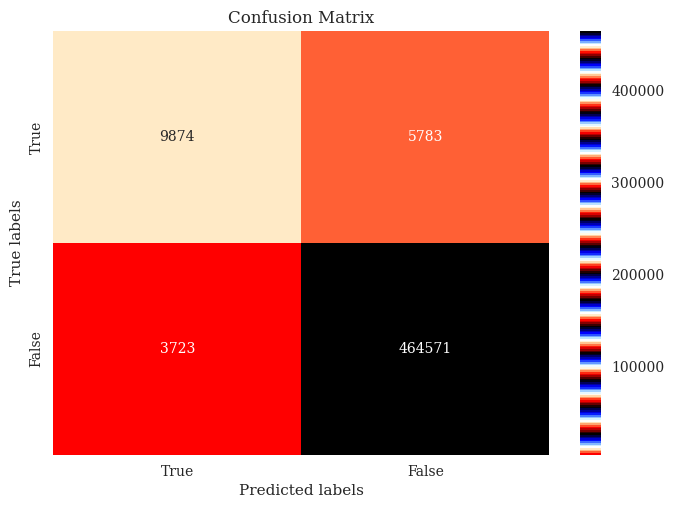

In [ ]:
%%time
#classificator 
rf = RandomForestClassifier(n_jobs = -2) 
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# get scores
rf_res = scorer(y_test, rf_pred)

Text(0.5, 0, 'Random Forest Feature Importance')

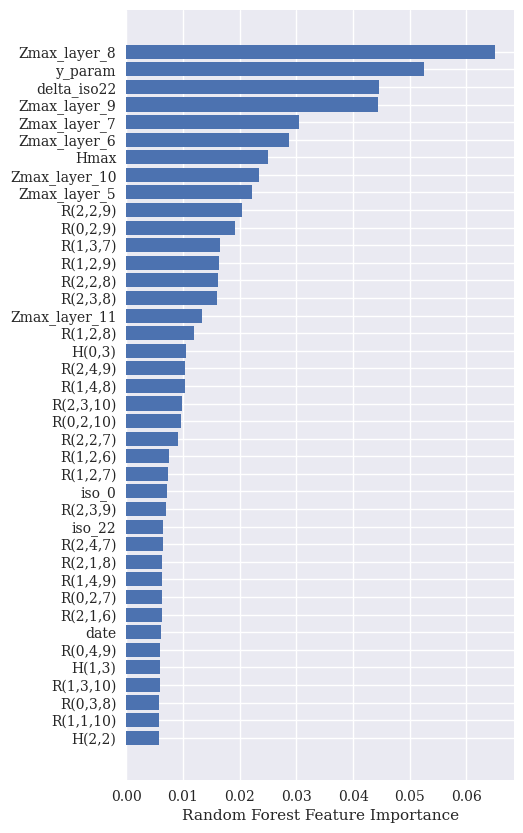

In [ ]:
plt.figure(figsize=(5,10))
sorted_idx = rf.feature_importances_.argsort()[-40:]
plt.barh(cols[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

### feature set 0

In [153]:
features_set_0 = ['Hmax', 'Zmax', 'H_Zmax', 'delta_iso22', 'y_param','Zmax_layer_6', 'Zmax_layer_7', 'Zmax_layer_8',
       'Zmax_layer_9', 'Zmax_layer_10']

In [154]:
feature_indices_0 = []
for feature in features_set_0:
    feature_indices_0.append(np.argwhere(np.array(cols) == feature))
feature_indices_0 = np.array(feature_indices_0).reshape(np.array(feature_indices_0).shape[0])
feature_indices_0


array([305, 306, 320, 307, 319, 313, 314, 315, 316, 317])

In [155]:
X_train_set_0 = X_train[:, feature_indices_0]
X_test_set_0 = X_test[:, feature_indices_0]

Accuracy is 0.9713
f1_score is 0.6258
precision_score is 0.7409
recall_score is 0.5416
roc_auc_score is 0.86
HSS is 0.6112
ETS is 0.4401
CSI is 0.4554
sedi is 0.7973
CPU times: user 15.1 s, sys: 35.8 ms, total: 15.2 s
Wall time: 15.2 s


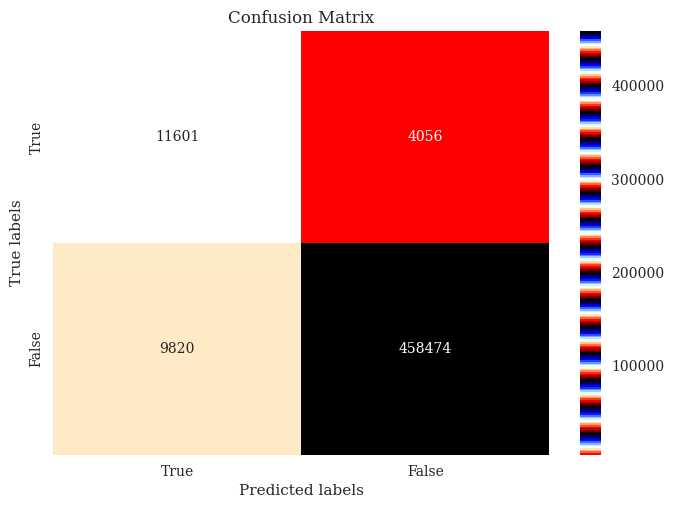

In [156]:
%%time
#classificator 
sgd = LogisticRegression(solver="saga", n_jobs = -1, random_state=24) 
sgd.fit(X_train_set_0, y_train)
sgd_pred_0 = sgd.predict(X_test_set_0)


# get scores
sgd_res = scorer(y_test, sgd_pred_0)

In [157]:
coef_set_0 = sgd.coef_.tolist()[0]
inter_set_0 = sgd.intercept_.tolist()[0]

In [158]:
coef_set_0, inter_set_0

([-0.6402480239966041,
  0.8974503789334118,
  0.29239410289074713,
  1.5515382541144216,
  -0.06722576052210379,
  0.40541207975864435,
  0.3554628604022989,
  0.2903414293829566,
  0.1589323452929145,
  0.08882231885804244],
 -5.054243724161584)

### feature set 1


In [159]:
features_set_1 = ['Hmax', 'Zmax', 'Zmax_layer_6', 'Zmax_layer_7', 'Zmax_layer_8',
       'Zmax_layer_9', 'Zmax_layer_10']

In [160]:
feature_indices_1 = []
for feature in features_set_1:
    feature_indices_1.append(np.argwhere(np.array(cols) == feature))
feature_indices_1 = np.array(feature_indices_1).reshape(np.array(feature_indices_1).shape[0])
feature_indices_1

array([305, 306, 313, 314, 315, 316, 317])

In [161]:
X_train_set_1 = X_train[:, feature_indices_1]
X_test_set_1 = X_test[:, feature_indices_1]

Accuracy is 0.9697
f1_score is 0.6086
precision_score is 0.7274
recall_score is 0.5232
roc_auc_score is 0.8526
HSS is 0.5933
ETS is 0.4218
CSI is 0.4374
sedi is 0.7839
CPU times: user 15.2 s, sys: 7.74 ms, total: 15.2 s
Wall time: 15.2 s


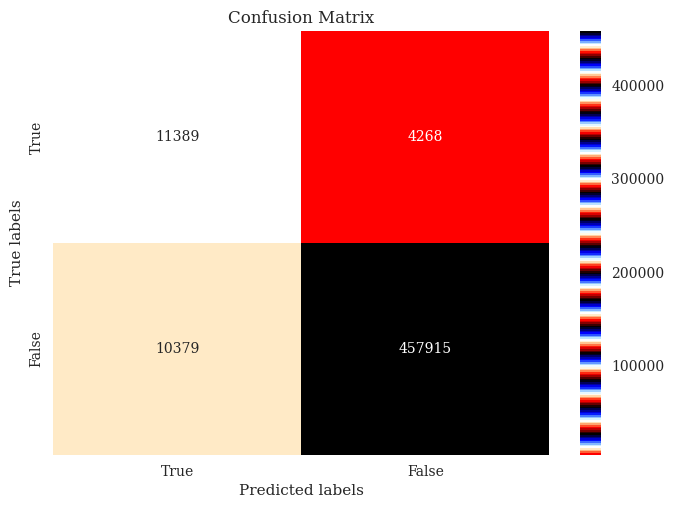

In [162]:
%%time
#classificator 
sgd = LogisticRegression(solver="saga", n_jobs = -1) 
sgd.fit(X_train_set_1, y_train)
sgd_pred_1 = sgd.predict(X_test_set_1)


# get scores
sgd_res = scorer(y_test, sgd_pred_1)

In [163]:
coef_set_1 = sgd.coef_.tolist()[0]
inter_set_1 = sgd.intercept_.tolist()[0]
coef_set_1, inter_set_1

([0.9899131219859455,
  0.754002607005723,
  0.3154611817917923,
  0.3147828342782613,
  0.2581372686875461,
  0.16879107285345113,
  0.09261709566768207],
 -4.922595547112332)

### feature set 2


In [217]:
features_set_2 = ['Hmax', 'Zmax', 'H_Zmax','Zmax_layer_6', 'Zmax_layer_7', 'Zmax_layer_8',
       'Zmax_layer_9', 'Zmax_layer_10']

In [218]:
feature_indices_2 = []
for feature in features_set_2:
    feature_indices_2.append(np.argwhere(np.array(cols) == feature))
feature_indices_2 = np.array(feature_indices_2).reshape(np.array(feature_indices_2).shape[0])
feature_indices_2


array([305, 306, 320, 313, 314, 315, 316, 317])

In [219]:
X_train_set_2 = X_train[:, feature_indices_2]
X_test_set_2 = X_test[:, feature_indices_2]

Accuracy is 0.9707
f1_score is 0.618
precision_score is 0.7324
recall_score is 0.5344
roc_auc_score is 0.8555
HSS is 0.6031
ETS is 0.4317
CSI is 0.4471
sedi is 0.7917
CPU times: user 15.3 s, sys: 35.1 ms, total: 15.4 s
Wall time: 15.4 s


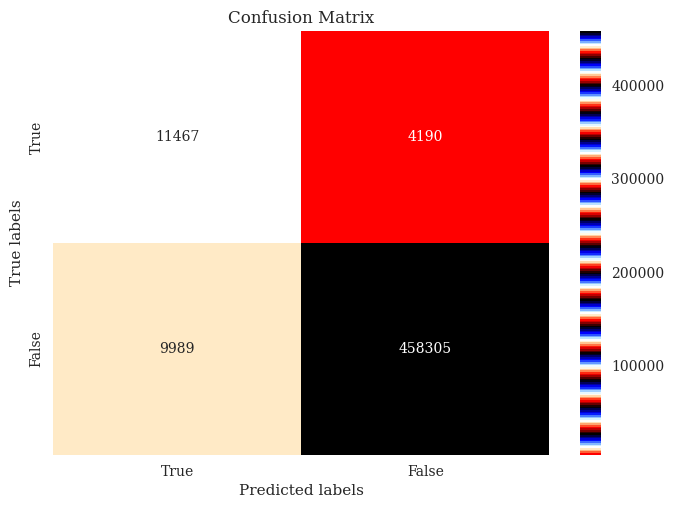

In [220]:
%%time
#classificator 
sgd = LogisticRegression(solver="saga", n_jobs = -1, random_state=42) 
sgd.fit(X_train_set_2, y_train)
sgd_pred_2 = sgd.predict(X_test_set_2)


# get scores
sgd_res = scorer(y_test, sgd_pred_2)

In [224]:
coef_set_2 = sgd.coef_.tolist()[0]
inter_set_2 = sgd.intercept_.tolist()[0]
coef_set_2, inter_set_2

([0.8061940405488975,
  0.92157806119421,
  0.297247741290093,
  0.39599442698504855,
  0.2587855889239227,
  0.24677932074219924,
  0.17081076184334903,
  0.08962434980927239],
 -4.959611610720029)

### get coefs

In [226]:
means = np.load(Paths.models + 'scaler_means.npy')
vars  = np.load(Paths.models + 'scaler_vars.npy')

In [227]:
means_set_0 = means[feature_indices_0]
means_set_1 = means[feature_indices_1]
means_set_2 = means[feature_indices_2]

In [234]:
vars_set_0 = vars[feature_indices_0]
vars_set_1 = vars[feature_indices_1]
vars_set_2 = vars[feature_indices_2]

In [230]:
X_test_reversed_scaled_0 = X_test_reversed_scaled[:, feature_indices_0]
X_test_reversed_scaled_1 = X_test_reversed_scaled[:, feature_indices_1]
X_test_reversed_scaled_2 = X_test_reversed_scaled[:, feature_indices_2]
X_test_reversed_scaled_0.shape, X_test_reversed_scaled_1.shape, X_test_reversed_scaled_2.shape

((483951, 10), (483951, 7), (483951, 8))

In [231]:
np.where(np.dot((X_test_reversed_scaled_0- means_set_0)/np.sqrt(vars_set_0), coef_set_0)+inter_set_0>0, 1,0)

array([0, 0, 0, ..., 1, 0, 0])

In [210]:
[f'(({features_set_0[i]} + {-means_set_0[i]}) / {np.sqrt(vars_set_0[i])})*{coef_set_0[i]}' for i in range(len(coef_set_0))],inter_set_0


(['((Hmax + -6030.0154726600085) / 2115.9922844899693)*-0.6402480239966041',
  '((Zmax + -17.94573080216485) / 10.416867445191416)*0.8974503789334118',
  '((H_Zmax + -3.1741566904376977) / 1.7496742083261316)*0.29239410289074713',
  '((delta_iso22 + 178.4893927146253) / 1969.9346958566946)*1.5515382541144216',
  '((y_param + -13.854570220419282) / 10.002661172354728)*-0.06722576052210379',
  '((Zmax_layer_6 + 22.592478072133012) / 53.301569061973964)*0.40541207975864435',
  '((Zmax_layer_7 + 47.45566322499165) / 56.83951905771273)*0.3554628604022989',
  '((Zmax_layer_8 + 69.32080560321884) / 51.05159453896699)*0.2903414293829566',
  '((Zmax_layer_9 + 82.09938249870234) / 42.29854135926742)*0.1589323452929145',
  '((Zmax_layer_10 + 88.58071157705417) / 35.06562540138608)*0.08882231885804244'],
 -5.054243724161584)

In [212]:
[f'(({features_set_1[i]} + {-means_set_1[i]}) / {np.sqrt(vars_set_1[i])})*{coef_set_1[i]}' for i in range(len(coef_set_1))],inter_set_1

(['((Hmax + -6030.0154726600085) / 2115.9922844899693)*0.9899131219859455',
  '((Zmax + -17.94573080216485) / 10.416867445191416)*0.754002607005723',
  '((Zmax_layer_6 + 22.592478072133012) / 53.301569061973964)*0.3154611817917923',
  '((Zmax_layer_7 + 47.45566322499165) / 56.83951905771273)*0.3147828342782613',
  '((Zmax_layer_8 + 69.32080560321884) / 51.05159453896699)*0.2581372686875461',
  '((Zmax_layer_9 + 82.09938249870234) / 42.29854135926742)*0.16879107285345113',
  '((Zmax_layer_10 + 88.58071157705417) / 35.06562540138608)*0.09261709566768207'],
 -4.922595547112332)

In [235]:
[f'(({features_set_2[i]} + {-means_set_2[i]}) / {np.sqrt(vars_set_2[i])})*{coef_set_2[i]}' for i in range(len(coef_set_2))],inter_set_2

(['((Hmax + -6030.0154726600085) / 2115.9922844899693)*0.8061940405488975',
  '((Zmax + -17.94573080216485) / 10.416867445191416)*0.92157806119421',
  '((H_Zmax + -3.1741566904376977) / 1.7496742083261316)*0.297247741290093',
  '((Zmax_layer_6 + 22.592478072133012) / 53.301569061973964)*0.39599442698504855',
  '((Zmax_layer_7 + 47.45566322499165) / 56.83951905771273)*0.2587855889239227',
  '((Zmax_layer_8 + 69.32080560321884) / 51.05159453896699)*0.24677932074219924',
  '((Zmax_layer_9 + 82.09938249870234) / 42.29854135926742)*0.17081076184334903',
  '((Zmax_layer_10 + 88.58071157705417) / 35.06562540138608)*0.08962434980927239'],
 -4.959611610720029)

In [ ]:
                                               # Уравнение для третьего варианта

In [ ]:
                                                  


x0 = ((Hmax + -6030.0154726600085) / 2115.9922844899693)*0.9899131219859455,               # Максимальная высота радиоэха, m
x1 = ((Zmax + -17.94573080216485) / 10.416867445191416)*0.75400260700572,                  # Максимальная отражаемость, dbZ
x2 = ((Zmax_layer_6 + 22.592478072133012) / 53.301569061973964)*0.3154611817917923,        # Отражаемость на уровне 6 км, dbZ 
x3 = ((Zmax_layer_7 + 47.45566322499165) / 56.83951905771273)*0.3147828342782613,          # Отражаемость на уровне 7 км, dbZ 
x4 = ((Zmax_layer_8 + 69.32080560321884) / 51.05159453896699)*0.2581372686875461,          # Отражаемость на уровне 8 км, dbZ 
x5 = ((Zmax_layer_9 + 82.09938249870234) / 42.29854135926742)*0.16879107285345113,         # Отражаемость на уровне 9 км, dbZ 
x6 = ((Zmax_layer_10 + 88.58071157705417) / 35.06562540138608)*0.09261709566768207         # Отражаемость на уровне 10 км, dbZ 
result = sum(xi) - 4.922595547112332                                                       # Уравнение для первого варианта


x0 = ((Hmax + -6030.0154726600085) / 2115.9922844899693) * 0.8061940405488975,             # Максимальная высота радиоэха, m
x1 = ((Zmax + -17.94573080216485) / 10.416867445191416) * 0.92157806119421,                # Максимальная отражаемость, dbZ
x2 = ((H_Zmax + -3.1741566904376977) / 1.7496742083261316) * 0.297247741290093,            # Уровень максимальной отражаемости, km
x3 = ((Zmax_layer_6 + 22.592478072133012) / 53.301569061973964) * 0.39599442698504855,     # Отражаемость на уровне 6 км, dbZ
x4 = ((Zmax_layer_7 + 47.45566322499165) / 56.83951905771273) * 0.2587855889239227,        # Отражаемость на уровне 7 км, dbZ
x5 = ((Zmax_layer_8 + 69.32080560321884) / 51.05159453896699) * 0.24677932074219924,       # Отражаемость на уровне 8 км, dbZ
x6 = ((Zmax_layer_9 + 82.09938249870234) / 42.29854135926742) * 0.17081076184334903,       # Отражаемость на уровне 9 км, dbZ
x7 = ((Zmax_layer_10 + 88.58071157705417) / 35.06562540138608) * 0.08962434980927239       # Отражаемость на уровне 10 км , dbZ
result = sum(xi) - 4.959611610720029                                                       # Уравнение для второго варианта

x0 = ((Hmax + -6030.0154726600085) / 2115.9922844899693) * -0.6402480239966041,            # Максимальная высота радиоэха, m
x1 = ((Zmax + -17.94573080216485) / 10.416867445191416) * 0.8974503789334118,              # Максимальная отражаемость, dbZ
x2 = ((H_Zmax + -3.1741566904376977) / 1.7496742083261316) * 0.29239410289074713,          # Уровень максимальной отражаемости, km
x3 = ((delta_iso22 + 178.4893927146253) / 1969.9346958566946) * 1.5515382541144216,        # Разница Максимальной высоты радиоэха и Высоты изотермы -22°C, m
x4 = ((y_param + -13.854570220419282) / 10.002661172354728) * -0.06722576052210379,        # Параметр Y
x5 = ((Zmax_layer_6 + 22.592478072133012) / 53.301569061973964) * 0.40541207975864435,     # Отражаемость на уровне 6 км, dbZ
x6 = ((Zmax_layer_7 + 47.45566322499165) / 56.83951905771273) * 0.3554628604022989,        # Отражаемость на уровне 7 км, dbZ
x7 = ((Zmax_layer_8 + 69.32080560321884) / 51.05159453896699) * 0.2903414293829566,        # Отражаемость на уровне 8 км, dbZ
x8 = ((Zmax_layer_9 + 82.09938249870234) / 42.29854135926742) * 0.1589323452929145,        # Отражаемость на уровне 9 км, dbZ
x9 = ((Zmax_layer_10 + 88.58071157705417) / 35.06562540138608) * 0.08882231885804244       # Отражаемость на уровне 10 км , dbZ
result = sum(xi) - 5.054243724161584                                                       # Уравнение для третьего варианта

# Если result > 0 - гроза есть,
#      result < 0 - грозы нет

Accuracy is 1.0
f1_score is 1.0
precision_score is 1.0
recall_score is 1.0
roc_auc_score is 1.0
HSS is 1.0
ETS is 1.0
CSI is 1.0
sedi is nan


0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
7    1.0
8    NaN
dtype: float64

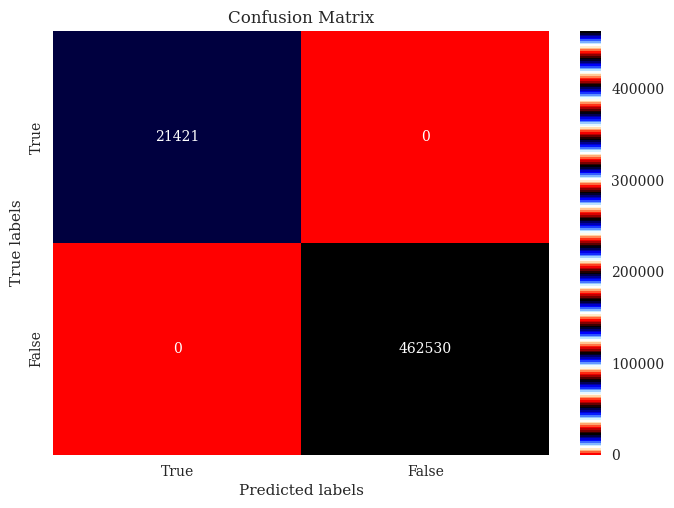

In [177]:
scaled_df = (np.subtract(X_test_reversed_scaled_0,means_set_0))/np.sqrt(vars_set_0)
dot_prod = np.dot(scaled_df, coef_set_0)+inter_set_0
res_preds_0 = np.where(dot_prod >= 0, 1,0)
scorer(sgd_pred_0, res_preds_0)

Accuracy is 1.0
f1_score is 1.0
precision_score is 1.0
recall_score is 1.0
roc_auc_score is 1.0
HSS is 1.0
ETS is 1.0
CSI is 1.0
sedi is nan


0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
7    1.0
8    NaN
dtype: float64

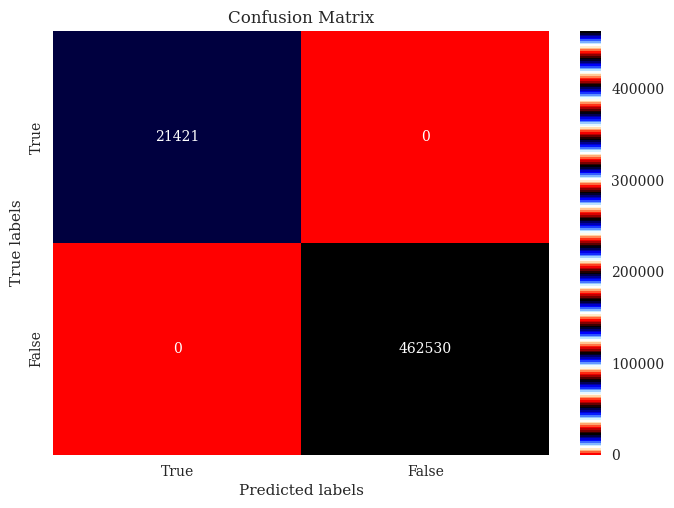

In [136]:
result = np.dot(X_test_set_0, coef_set_0)+inter_set_0
preds = np.where(result >= 0, 1,0)
scorer(sgd_pred_0, preds)

Accuracy is 0.9751
f1_score is 0.6357
precision_score is 0.6691
recall_score is 0.6054
roc_auc_score is 0.8272
HSS is 0.6228
ETS is 0.4523
CSI is 0.4659
sedi is 0.8273
CPU times: user 1min 52s, sys: 228 ms, total: 1min 52s
Wall time: 22.6 s


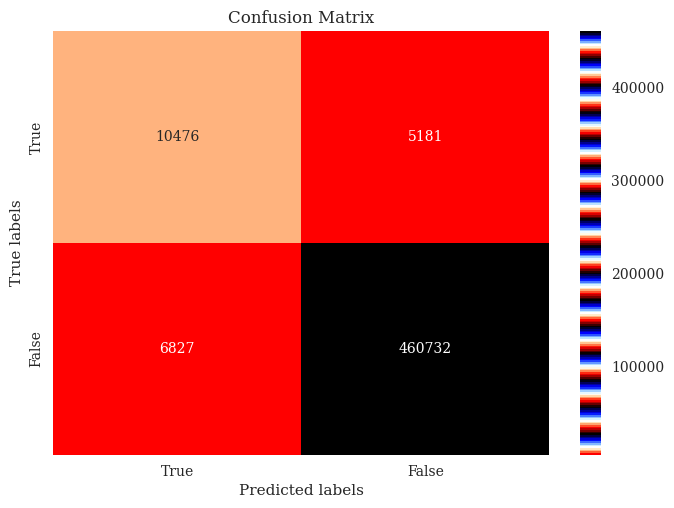

In [15]:
%%time
#classificator 
knn = KNeighborsClassifier(n_neighbors=9,leaf_size=5, n_jobs = -2) 
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# get scores
knn_res = scorer(y_test, knn_pred)

In [16]:
from catboost import CatBoostClassifier

Accuracy is 0.9766
f1_score is 0.6484
precision_score is 0.6672
recall_score is 0.6306
roc_auc_score is 0.827
HSS is 0.6363
ETS is 0.4666
CSI is 0.4797
sedi is 0.8416
CPU times: user 14min 23s, sys: 18.9 s, total: 14min 42s
Wall time: 1min 43s


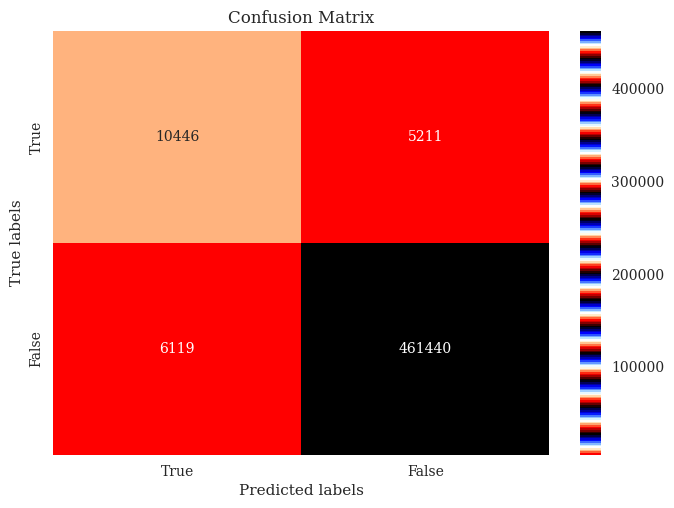

In [17]:
%%time
#classificator 
catbc = CatBoostClassifier(verbose=0) 
catbc.fit(X_train, y_train)
catbc_pred = catbc.predict(X_test)

# get scores
catbc_res = scorer(y_test, catbc_pred)

Accuracy is 0.999
f1_score is 0.1721
precision_score is 0.2015
recall_score is 0.1503
roc_auc_score is 0.6004
HSS is 0.1716
ETS is 0.0939
CSI is 0.0942
sedi is 0.6135


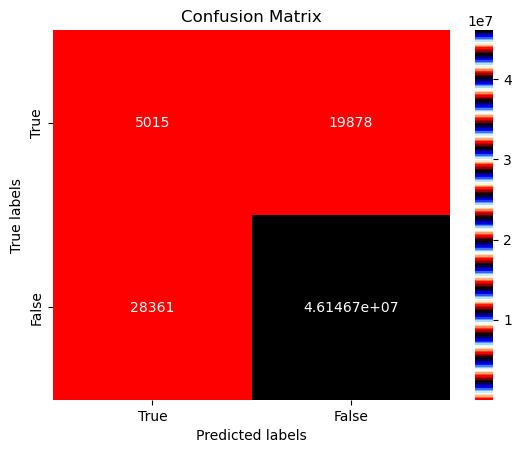

In [2]:
stack = np.load(Paths.interim + f'stack_{station_number}.npy')
stack = np.delete(stack, (1,2), 0)
phen = stack[0:1155,:,:,12]
phen[phen != 26] = 0
phen[phen == 26] = 1
Y_res = scorer(stack[0:1155,:,:,-1].flatten(), phen.flatten())

In [14]:
metrics = pd.Series(['acc', 'f1', 'pre', 'rec', 'roc_auc', 'hss', 'ets', 'csi', 'sedi'])
df = pd.concat([Y_res, sgd_res, knn_res, catbc_res, rf_res, metrics],
               axis=1,
               keys=['Y_param', "SGDClassifier", 'KNeighborsClassifier', 'CatBoostClassifier','RandomForestClassifier', 'metrics']).set_index('metrics')
df.T

metrics,acc,f1,pre,rec,roc_auc,hss,ets,csi,sedi
Y_param,0.999308,0.136207,0.160910,0.118080,0.580251,0.135869,0.072886,0.073081,0.590143
SGDClassifier,0.976412,0.620768,0.596602,0.646973,0.792858,0.608616,0.437418,0.450082,0.845137
KNeighborsClassifier,0.976135,0.653857,0.696557,0.616089,0.841021,0.641546,0.472262,0.485726,0.836171
CatBoostClassifier,0.978000,0.668328,0.684997,0.652452,0.836398,0.656958,0.489157,0.501872,0.855234
RandomForestClassifier,0.980525,0.684142,0.651785,0.719879,0.821652,0.674120,0.508432,0.519921,0.887839


In [ ]:
metrics = pd.Series(['acc', 'f1', 'pre', 'rec', 'roc_auc', 'hss', 'ets', 'csi', 'sedi'])
df = pd.concat([Y_res, sgd_res, knn_res, catbc_res, rf_res, metrics],
               axis=1,
               keys=['Y_param', "SGDClassifier", 'KNeighborsClassifier', 'CatBoostClassifier','RandomForestClassifier', 'metrics']).set_index('metrics')
df.T

metrics,acc,f1,pre,rec,roc_auc,hss,ets,csi,sedi
Y_param,0.999308,0.136207,0.160910,0.118080,0.580251,0.135869,0.072886,0.073081,0.590143
SGDClassifier,0.974953,0.627989,0.653318,0.604551,0.819514,0.615050,0.444095,0.457714,0.825357
KNeighborsClassifier,0.975759,0.645339,0.681548,0.612783,0.833573,0.632826,0.462872,0.476384,0.832828
CatBoostClassifier,0.977371,0.658367,0.673820,0.643607,0.830671,0.646671,0.477838,0.490720,0.849451
RandomForestClassifier,0.979362,0.672461,0.654723,0.691187,0.822470,0.661815,0.494561,0.506547,0.873424
